## 1.导入模块

In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 2.读取数据

In [2]:
Titanic_train = pd.read_csv('train.csv')
Titanic_test = pd.read_csv('test.csv')

## 3.查看数据

In [3]:
Titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

有官网信息可得：<br>
PassengerId => 乘客ID <br>
Survived => 是否获救（1获救/0未获救）<br>
Pclass => 乘客等级(1/2/3等舱位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年龄<br>
SibSp => 堂兄弟/妹个数<br>
Parch => 父母与小孩个数<br>
Ticket => 船票信息<br>
Fare => 票价<br>
Cabin => 客舱<br>
Embarked => 登船港口<br>
乘客等级、性别、年龄、票价可以肯定与获救情况有关

In [4]:
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


有上述数据可以看出，总共有891名乘客，但是Age（年龄）仅有714条数据，Cabin仅有204条数据

In [5]:
Titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


大概0.383838的人最后获救了，2/3等舱的人数比1等舱要多，平均乘客年龄大概是29.7岁

## 4.查看各字段与Survival的关系

(1)各乘客等级的获救情况

<Figure size 432x288 with 0 Axes>

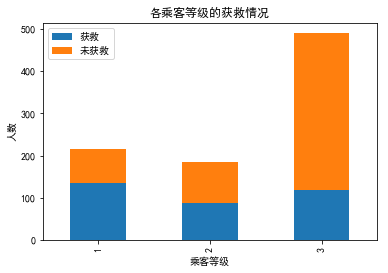

In [6]:
# 中文字体设置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = Titanic_train.Pclass[Titanic_train.Survived == 0].value_counts()
Survived_1 = Titanic_train.Pclass[Titanic_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()

由上图可知，等级为3的乘客获救的概率最低，故获救情况与乘客的等级有关

(2)各登录港口的获救情况

<Figure size 432x288 with 0 Axes>

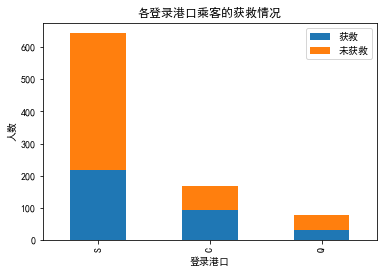

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = Titanic_train.Embarked[Titanic_train.Survived == 0].value_counts()
Survived_1 = Titanic_train.Embarked[Titanic_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

由上图可以看出，各个登录港口的获救比例不一样，故获救情况与登录港口有关
登录的港口可能与该人的舱位有关，故可能影响获救情况

(3)各性别的获救情况

<Figure size 432x288 with 0 Axes>

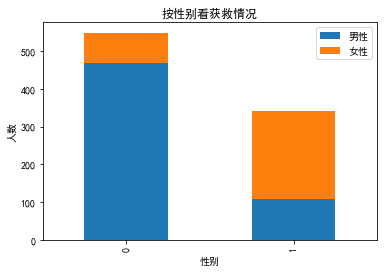

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = Titanic_train.Survived[Titanic_train.Sex == 'male'].value_counts()
Survived_f = Titanic_train.Survived[Titanic_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

很明显，女性获救的比例更高，所以获救比例与性别有巨大的关系

(4)家族关于获救情况

In [9]:
g = Titanic_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

并未看出什么关系

In [10]:
g = Titanic_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

同样未看出关系

(5) 船舱对获救情况的影响

<Figure size 432x288 with 0 Axes>

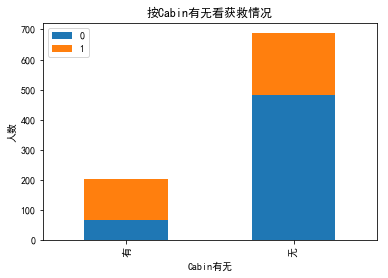

In [11]:
Titanic_train.Cabin.value_counts()

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = Titanic_train.Survived[pd.notnull(Titanic_train.Cabin)].value_counts()
Survived_nocabin = Titanic_train.Survived[pd.isnull(Titanic_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

由于Cabin的数据量太少，故删除Cabin特征

# 5.整理部分特征

1.处理Cabin

In [12]:
cabin_only = Titanic_train[['Cabin']].copy()
cabin_test = Titanic_test[['Cabin']].copy()

cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)
cabin_test["Cabin_Data"] = cabin_test["Cabin"].isnull().apply(lambda x: not x)

cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
cabin_test["Deck"] = cabin_test["Cabin"].str.slice(0,1)
cabin_test["Room"] = cabin_test["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")


cabin_only.drop(["Cabin", "Cabin_Data"], axis=1, inplace=True, errors="ignore")
cabin_test.drop(["Cabin", "Cabin_Data"], axis=1, inplace=True, errors="ignore")


cabin_only["Deck"] = cabin_only["Deck"].fillna("N")
cabin_only["Room"] = cabin_only["Room"].fillna(cabin_only["Room"].mean())
cabin_test["Deck"] = cabin_test["Deck"].fillna("N")
cabin_test["Room"] = cabin_test["Room"].fillna(cabin_test["Room"].mean())



In [13]:
def one_hot_column(df, label, drop_col=False):
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df


def one_hot(df, labels, drop_col=False):
   
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

In [14]:
cabin_only = one_hot(cabin_only, ["Deck"],drop_col=True)
cabin_test = one_hot(cabin_test, ["Deck"],drop_col=True)


In [15]:
for column in cabin_only.columns.values[1:]:
    Titanic_train[column] = cabin_only[column]
for column in cabin_test.columns.values[1:]:
    Titanic_test[column] = cabin_test[column]
    

In [16]:
Titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,0,0,0,0,0,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,0,0,0,0,0,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,0,0,0,0,1,0,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,0,0,0,0,0,0,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,0,0,0,0,0,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,0,0,0,0,0,0,0,1,0


2.根据前述猜测，删除Ticket和Cabin数据

In [17]:
Titanic_train = Titanic_train.drop(['Cabin','Ticket'],axis=1)
Titanic_test = Titanic_test.drop(['Cabin','Ticket'],axis=1)


In [18]:
Titanic_train = Titanic_train.dropna()
Titanic_test["Age"] = Titanic_test['Age'].fillna(Titanic_train['Age'].median())  

3.根据Name和PassengerId 构建Title特征

In [19]:
combine = [Titanic_train,Titanic_test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(Titanic_train['Title'], Titanic_train['Sex'])
                 
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
Titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


4.删除Name,PassengerId数据

In [20]:
Titanic_train = Titanic_train.drop(['Name','PassengerId'],axis=1)
Titanic_test = Titanic_test.drop(['Name','PassengerId'],axis=1)
combine = [Titanic_train,Titanic_test]


5. 将性别转换成数字

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

6. 将年龄进行标准化

In [22]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 5


7.基于Parch和SibSp创建新特征FamilySize和IsAlone

In [23]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
Titanic_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.777778
2,3,0.569892
1,2,0.546763
6,7,0.333333
0,1,0.318408
4,5,0.272727
5,6,0.136364
7,8,0.000000


8.使用 RandomForestClassifier 填补缺失的年龄属性

In [24]:
# 创建一个空的 2 X 3 矩阵
guess_ages = np.zeros((2, 3))
# print(guess_ages)

# 猜测乘客的年龄
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()

            age_guess = guess.median()
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            # 判断数据集中年龄为空的记录并将猜测的年龄赋值
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), 'Age'] = guess_ages[i, j]

    dataset['Age'] = dataset['Age'].astype(int)

In [25]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
Titanic_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
         

,IsAlone,Survived
0,0,0.516129
1,1,0.318408


9. 删除SibSp、Parch、FamilySize数据

In [26]:
Titanic_train = Titanic_train.drop(['SibSp','Parch','FamilySize'],axis=1)
Titanic_test = Titanic_test.drop(['SibSp','Parch','FamilySize'],axis=1)
combine = [Titanic_train,Titanic_test]

10.创建一个特征Age*Pclass

In [27]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
Titanic_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2
10,0,0,3


11.完善Embarked特征，并转换成数字型

In [28]:
freq_port = Titanic_train.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
Titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.607692
2,S,0.362816
1,Q,0.285714


In [29]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
Titanic_train.head()  

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,0,0,0,0,0,0,0,1,0,1,0,3
1,1,1,1,2,71.2833,1,0,0,1,0,0,0,0,0,0,3,0,2
2,1,3,1,1,7.9250,0,0,0,0,0,0,0,0,1,0,2,1,3
3,1,1,1,2,53.1000,0,0,0,1,0,0,0,0,0,0,3,0,2
4,0,3,0,2,8.0500,0,0,0,0,0,0,0,0,1,0,1,1,6


12.完善并填充并标准化Fare

In [30]:
Titanic_test['Fare'].fillna(Titanic_test['Fare'].dropna().median(), inplace=True)
Titanic_test.head()

,Pclass,Sex,Age,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Title,IsAlone,Age*Class
0,3,0,2,7.8292,2,0,0,0,0,0,0,0,1,1,1,6
1,3,1,2,7.0000,0,0,0,0,0,0,0,0,1,3,0,6
2,2,0,3,9.6875,2,0,0,0,0,0,0,0,1,1,1,6
3,3,0,1,8.6625,0,0,0,0,0,0,0,0,1,1,1,3
4,3,1,1,12.2875,0,0,0,0,0,0,0,0,1,3,0,3


In [31]:
Titanic_train['FareBand'] = pd.qcut(Titanic_train['Fare'], 4)
Titanic_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.05]",0.204188
1,"(8.05, 15.646]",0.321212
2,"(15.646, 33.0]",0.486034
3,"(33.0, 512.329]",0.615819


In [32]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
Titanic_train = Titanic_train.drop(['FareBand'], axis=1)
combine = [Titanic_train, Titanic_test]  


13.处理完的数据：

In [33]:
Titanic_train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,3
1,1,1,1,2,3,1,0,0,1,0,0,0,0,0,0,3,0,2
2,1,3,1,1,1,0,0,0,0,0,0,0,0,1,0,2,1,3
3,1,1,1,2,3,0,0,0,1,0,0,0,0,0,0,3,0,2
4,0,3,0,2,1,0,0,0,0,0,0,0,0,1,0,1,1,6


# 6. 对数据集进行划分

In [34]:
X_train = Titanic_train.drop("Survived", axis=1)
Y_train = Titanic_train["Survived"]
X_test  = Titanic_test[['Pclass','Sex','Age','Fare','Embarked','Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_N']]

X_train.shape, Y_train.shape, X_test.shape    

((712, 17), (712,), (418, 13))

In [35]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Title,IsAlone,Age*Class
0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,3
1,1,1,2,3,1,0,0,1,0,0,0,0,0,0,3,0,2
2,3,1,1,1,0,0,0,0,0,0,0,0,1,0,2,1,3
3,1,1,2,3,0,0,0,1,0,0,0,0,0,0,3,0,2
4,3,0,2,1,0,0,0,0,0,0,0,0,1,0,1,1,6


In [36]:
X_test['Deck_T'] = 0
X_test['Title'] = Titanic_test['Title']
X_test['IsAlone'] = Titanic_test['IsAlone']
X_test['Age*Class'] = Titanic_test['Age*Class']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Title,IsAlone,Age*Class
0,3,0,2,0,2,0,0,0,0,0,0,0,1,0,1,1,6
1,3,1,2,0,0,0,0,0,0,0,0,0,1,0,3,0,6
2,2,0,3,1,2,0,0,0,0,0,0,0,1,0,1,1,6
3,3,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,3
4,3,1,1,1,0,0,0,0,0,0,0,0,1,0,3,0,3


In [38]:
res = pd.DataFrame(X_train)

res.to_csv('X_train.csv',index=False,sep=',')

res = pd.DataFrame(Y_train)

res.to_csv('Y_train.csv',index=False,sep=',')

res = pd.DataFrame(X_test)

res.to_csv('X_test.csv',index=False,sep=',')

# 7.模型建立

1.决策树

In [87]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
#score 0.77511
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

2.随机森林

In [73]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
#score 0.77033    

3.支持向量机

In [74]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
#score 0.76555

4.逻辑回归

In [75]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
#score 0.76076

5.K紧邻

In [76]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
#score  0.74162

6.朴素贝叶斯分类器

In [77]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
# score 0.73684

7.感知机

In [78]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
# score 0.73452

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


8.SVC支持向量机

In [79]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

9.随机梯度下降

In [80]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


模型融合（上述所有模型）

In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


In [82]:
qda = QuadraticDiscriminantAnalysis(store_covariances=True)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)
svc = SVC()
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 3)
gaussian = GaussianNB()
perceptron = Perceptron()
linear_svc = LinearSVC()
sgd = SGDClassifier()
eclf1 = VotingClassifier(estimators=[('qda',qda),('clf',clf),('lr',logreg),('dt',decision_tree),('rf',random_forest),('svc',svc),('knn',knn),('gaussian',gaussian),('perceptron',perceptron)\
                                    ,('linear_svc',linear_svc),('sgd',sgd)],voting ='hard')

In [83]:
eclf1.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), F

VotingClassifier(estimators=[('qda', QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=True, tol=0.0001)), ('clf', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
  ...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [84]:
Y_pred = eclf1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 8.将答案写入result.csv文件

In [89]:
general = pd.read_csv('gender_submission.csv')
data = {
    'PassengerId':general['PassengerId'],
    'Survived':Y_pred
}


res = pd.DataFrame(data)

res.to_csv('result_3.csv',index=False,sep=',')